# New Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
from google.colab import files

# Upload the file manually
uploaded = files.upload()

# Assuming the uploaded file name is 'cumulative_2025.09.19_10.48.14.csv'
# If you uploaded a different file, replace the filename below
file_name = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(file_name, comment='#', on_bad_lines='skip', engine='python')

# Drop CANDIDATE rows (keep only CONFIRMED vs FALSE POSITIVE)
df = df[df['koi_disposition'] != 'CANDIDATE']

# Target column
y = df['koi_disposition'].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})
# Drop ID/name columns (not useful for ML)
drop_cols = ['epid','kepoi_name','kepler_name','koi_disposition','ra','dec','koi_kepmag']

X = df.drop(columns=drop_cols, errors='ignore')


#  Keep only numeric columns
X = X.select_dtypes(include=[np.number])

#  Handle missing values
X = X.fillna(X.mean())

print("Shape of numeric dataset:", X.shape)
display(df.head())

Saving cumulative_2025.09.19_10.48.14.csv to cumulative_2025.09.19_10.48.14 (1).csv
Shape of numeric dataset: (7585, 41)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [ ]:
# --- Feature Explanations Dictionary ---

# --- Top 10 Feature Explanations Dictionary ---

feature_explanations = {
    'koi_score': "Kepler Object of Interest score, a statistical measure (0 to 1) of how likely the signal is a true planet. Higher scores (closer to 1.0) mean greater confidence.",
    'koi_fpflag_ss': "False Positive Flag (Stellar/Sky): A binary flag (0 or 1) indicating the signal is likely caused by an astronomical false positive, often due to nearby stars or background noise.",
    'koi_fpflag_co': "False Positive Flag (Centroid Offset): A binary flag (0 or 1) indicating the signal's centroid (center of light) shifted during transit, suggesting the source is not the target star.",
    'koi_fpflag_nt': "False Positive Flag (Non-Transiting Event): A binary flag (0 or 1) indicating the signal is likely a transit of a known non-planet object, such as a star's rotational variation or instrument noise.",
    'koi_tce_plnt_num': "TCE Planet Number: The number assigned to the planet candidate in its star system (e.g., 1 for the first planet found, 2 for the second).",
    'koi_steff_err1': "Effective Temperature Error (Upper): The positive error bar on the star's effective temperature (in Kelvin). Larger errors indicate lower certainty about the star's properties.",
    'koi_prad': "Planetary Radius: The derived radius of the planet candidate, typically measured in units of Earth radii ($R_{Earth}$).",
    'koi_steff_err2': "Effective Temperature Error (Lower): The negative error bar on the star's effective temperature (in Kelvin).",
    'koi_srad_err2': "Stellar Radius Error (Lower): The negative error bar on the radius of the host star (in units of solar radii ($R_{Solar}$)).",
    'koi_model_snr': "Model Signal-to-Noise Ratio (SNR): A measure of the strength of the planet transit signal relative to the noise. Higher values mean a cleaner, more reliable signal."
}
# --- Display Feature Explanations ---

print("="*50)
print("🔍 Key Feature Explanations (Top Predictors)")
print("="*50)


features_to_explain = [
    'koi_score',
    'koi_fpflag_ss',
    'koi_period',
    'koi_duration',
    'koi_depth',
    'koi_score',
    'koi_fpflag_ss',
    'koi_fpflag_co',
    'koi_fpflag_nt',
  'koi_tce_plnt_num',
    'koi_steff_err1'
    'koi_prad'
   'koi_steff_err2'
    'koi_srad_err2'
     'koi_model_snr'

]


for feature in features_to_explain:
    if feature in feature_explanations:
        print(f"**{feature}**: {feature_explanations[feature]}")
    else:
        print(f"**{feature}**: Explanation not available.")

print("="*50)

🔍 Key Feature Explanations (Top Predictors)
**koi_score**: Kepler Object of Interest score, a statistical measure (0 to 1) of how likely the signal is a true planet. Higher scores (closer to 1.0) mean greater confidence.
**koi_fpflag_ss**: False Positive Flag (Stellar/Sky): A binary flag (0 or 1) indicating the signal is likely caused by an astronomical false positive, often due to nearby stars or background noise.
**koi_period**: Explanation not available.
**koi_duration**: Explanation not available.
**koi_depth**: Explanation not available.
**koi_score**: Kepler Object of Interest score, a statistical measure (0 to 1) of how likely the signal is a true planet. Higher scores (closer to 1.0) mean greater confidence.
**koi_fpflag_ss**: False Positive Flag (Stellar/Sky): A binary flag (0 or 1) indicating the signal is likely caused by an astronomical false positive, often due to nearby stars or background noise.
**koi_fpflag_co**: False Positive Flag (Centroid Offset): A binary flag (0 o

In [ ]:
# 1. Get the feature names used during training
feature_names = X.columns
print("Number of features:", len(feature_names))
print("First 10 features:", feature_names[:10])

# 2. Create a dictionary with feature names and values
# (Fill in real values if you know them, otherwise just use 0 or mean)
candidate_data = {col: 0 for col in feature_names}  # initialize with zeros

# Example: overwrite some important features manually
candidate_data.update({
    'koi_score': 0.98,
    'koi_period': 45.2,
    'koi_duration': 3.2,
    'koi_depth': 500.0
})

# 3. Convert to DataFrame
new_candidate = pd.DataFrame([candidate_data], columns=feature_names)

# 4. Apply imputer + scaler
new_candidate_imputed = imputer.transform(new_candidate)
new_candidate_scaled = scaler.transform(new_candidate_imputed)

# 5. Predict
prediction = model.predict(new_candidate_scaled)
print("Prediction:", prediction)




Number of features: 41
First 10 features: Index(['kepid', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk'],
      dtype='object')
Prediction: [1]


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['koi_teq_err1' 'koi_teq_err2']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
print(y.value_counts())
print(y.value_counts(normalize=True))  # percentage


koi_disposition
0    4839
1    2746
Name: count, dtype: int64
koi_disposition
0    0.63797
1    0.36203
Name: proportion, dtype: float64


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       968
           1       0.99      0.98      0.99       549

    accuracy                           0.99      1517
   macro avg       0.99      0.99      0.99      1517
weighted avg       0.99      0.99      0.99      1517



In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

results = {}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n🔹 {name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    best_model="GradientBoostingClassifier"



🔹 Logistic Regression
Accuracy: 0.988134475939354
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       968
           1       0.99      0.98      0.98       549

    accuracy                           0.99      1517
   macro avg       0.99      0.99      0.99      1517
weighted avg       0.99      0.99      0.99      1517


🔹 Random Forest
Accuracy: 0.990771259063942
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       968
           1       0.99      0.98      0.99       549

    accuracy                           0.99      1517
   macro avg       0.99      0.99      0.99      1517
weighted avg       0.99      0.99      0.99      1517


🔹 Gradient Boosting
Accuracy: 0.99340804218853
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       968
           1       1.00      0.98      0.99       549

    accuracy                          

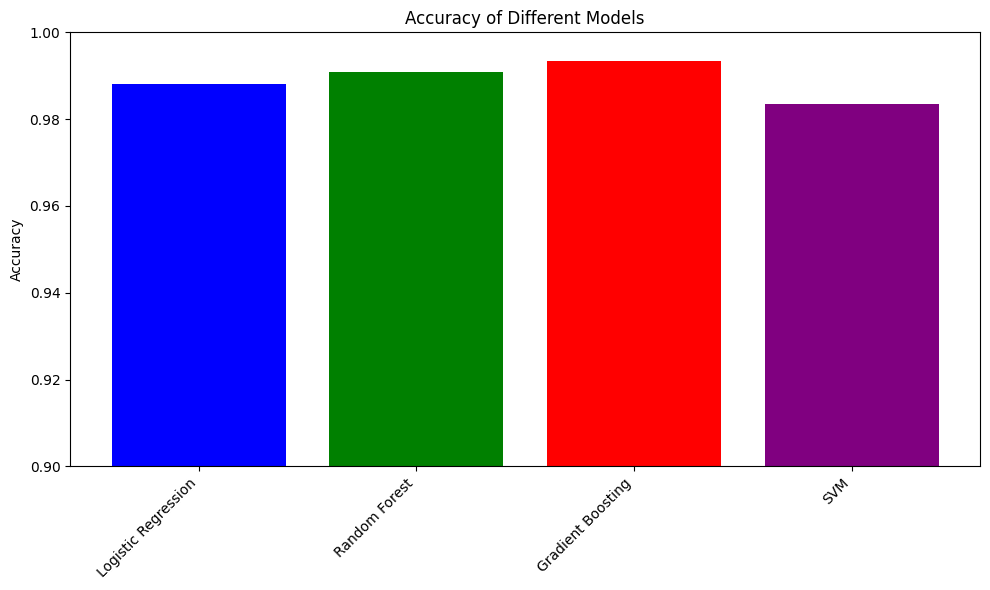

In [ ]:
# Create a bar plot of model accuracies
model_names = list(results.keys())
accuracy_scores = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.9, 1.0) # Set y-axis limits to focus on the differences
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
# -----------------------------------------------------
# NEW CELL: Model Selection Interface
# -----------------------------------------------------
import ipywidgets as widgets
from IPython.display import display

# Get the list of model names from the trained models dictionary
model_names = list(models.keys())

# Create a Radio Button widget for model selection
model_selector = widgets.RadioButtons(
    options=model_names,
    description='Select Model:',
    disabled=False,
    layout=widgets.Layout(width='auto')
)

print("Select Model for Prediction")
display(model_selector)
# -----------------------------------------------------

### Select Model for Prediction ###


RadioButtons(description='Select Model:', layout=Layout(width='auto'), options=('Logistic Regression', 'Random…

In [ ]:
# 1. Get the feature names used during training
feature_names = X.columns
print("Number of features:", len(feature_names))
print("First 10 features:", feature_names[:10])

# 2. Create a dictionary with feature names and values
# (Fill in real values if you know them, otherwise just use 0 or mean)
candidate_data = {col: 0 for col in feature_names}  # initialize with zeros

# Example: overwrite some important features manually
candidate_data.update({
    'koi_score': 0.98,
    'koi_period': 45.2,
    'koi_duration': 3.2,
    'koi_depth': 500.0
})

# 3. Convert to DataFrame
new_candidate = pd.DataFrame([candidate_data], columns=feature_names)

# 4. Apply imputer + scaler
new_candidate_imputed = imputer.transform(new_candidate)
new_candidate_scaled = scaler.transform(new_candidate_imputed)



# 1. Get the name of the model selected by the user from the widget.
selected_model_name = model_selector.value

# 2. Retrieve the actual trained model object from the 'models' dictionary.
model_to_use = models[selected_model_name]

# 3. Determine if the model supports probability prediction (e.g., SVM needs probability=True)
#    All your current models support .predict_proba() because you initialized SVM with it.

print(f"--- Prediction using {selected_model_name} ---")

# --- IF/ELIF Block for Prediction and Output ---
if selected_model_name == "Logistic Regression":
    # Logistic Regression prediction logic
    prediction = model_to_use.predict(new_candidate_scaled)
    prob = model_to_use.predict_proba(new_candidate_scaled)
    print("Prediction (0=False Positive, 1=Confirmed):", prediction[0])
    print("Prediction probability (0/1):", prob[0])

elif selected_model_name == "Random Forest":
    # Random Forest prediction logic
    prediction = model_to_use.predict(new_candidate_scaled)
    prob = model_to_use.predict_proba(new_candidate_scaled)
    print("Prediction (0=False Positive, 1=Confirmed):", prediction[0])
    print("Prediction probability (0/1):", prob[0])

elif selected_model_name == "Gradient Boosting":
    # Gradient Boosting prediction logic
    prediction = model_to_use.predict(new_candidate_scaled)
    prob = model_to_use.predict_proba(new_candidate_scaled)
    print("Prediction (0=False Positive, 1=Confirmed):", prediction[0])
    print("Prediction probability (0/1):", prob[0])

elif selected_model_name == "SVM":
    # SVM prediction logic
    prediction = model_to_use.predict(new_candidate_scaled)
    prob = model_to_use.predict_proba(new_candidate_scaled)
    print("Prediction (0=False Positive, 1=Confirmed):", prediction[0])
    print("Prediction probability (0/1):", prob[0])

else:
    print(f"Error: No prediction logic defined for selected model: {selected_model_name}")

# -----------------------------------------------------

Number of features: 41
First 10 features: Index(['kepid', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk'],
      dtype='object')
--- Prediction using Gradient Boosting ---
Prediction (0=False Positive, 1=Confirmed): 1
Prediction probability (0/1): [4.21376847e-04 9.99578623e-01]


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['koi_teq_err1' 'koi_teq_err2']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Drop columns that are all NaN before imputation
X_clean = X.dropna(axis=1, how="all")

# Step 2: Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_clean)

# Step 3: Rebuild DataFrame with the right feature names
X_imputed_df = pd.DataFrame(X_imputed, columns=X_clean.columns)

# Step 4: Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Train Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Step 7: Feature importances
importance_df = pd.DataFrame({
    'feature': X_clean.columns,
    'importance': gradient_boosting_model.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nTop 10 Important Features:\n")
print(importance_df.head(10))




Top 10 Important Features:

             feature  importance
1          koi_score    0.913430
3      koi_fpflag_ss    0.037138
4      koi_fpflag_co    0.018804
2      koi_fpflag_nt    0.006777
29  koi_tce_plnt_num    0.004815
31    koi_steff_err1    0.002620
21          koi_prad    0.002346
32    koi_steff_err2    0.001461
38     koi_srad_err2    0.001407
28     koi_model_snr    0.001185


In [ ]:
# --- Calculate Statistics for Reference ---
import pandas as pd
import numpy as np

# NOTE: Replace X_FEATURES_DF with the actual DataFrame variable
# that holds your features BEFORE scaling (e.g., X_train_df, X_features, etc.).
reference_df = X_FEATURES_DF.copy()

# Calculate the mean and standard deviation (or min/max) for key features
# We'll use mean and std dev as it gives a sense of the central tendency and spread.
stats = reference_df[['koi_score', 'koi_period', 'koi_duration', 'koi_depth']].agg(['mean', 'std', 'min', 'max'])
stats = stats.transpose() # Transpose to make features the index

# Format the results for clean display
stats_display = stats.applymap(lambda x: f"{x:.3f}")

NameError: name 'X_FEATURES_DF' is not defined

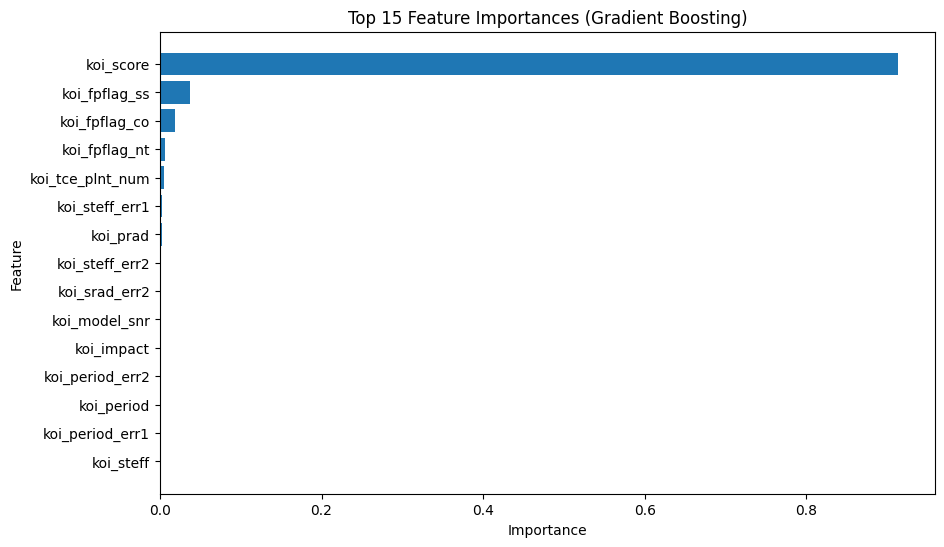

In [ ]:
import matplotlib.pyplot as plt

# Pick top 15 most important features
top_features = importance_df.head(15)

plt.figure(figsize=(10,6))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 15 Feature Importances (Gradient Boosting)")
plt.gca().invert_yaxis()  # most important at top
plt.show()




In [ ]:
# Choose the best model
best_model = gradient_boosting_model   # or model

# Rebuild candidate with correct features
candidate_data = {col: X_clean[col].mean() for col in X_clean.columns}
candidate_data.update({
    'koi_score': 0.98,
    'koi_period': 45.2,
    'koi_duration': 3.2,
    'koi_depth': 500.0
})

new_candidate = pd.DataFrame([candidate_data], columns=X_clean.columns)

# Apply preprocessing consistently
new_candidate_imputed = imputer.transform(new_candidate)
new_candidate_scaled = scaler.transform(new_candidate_imputed)

# Predict
prediction = best_model.predict(new_candidate_scaled)
prob = best_model.predict_proba(new_candidate_scaled)

print("Prediction:", prediction)
print("Prediction probability:", prob)



Prediction: [1]
Prediction probability: [[0.03016623 0.96983377]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(selected_model_name)


Gradient Boosting
